In [1]:
!pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 82.8 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 16.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nilearn 0.11.1 requires scikit-learn>=1.4.0, but you have scikit-learn 1.3.2 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score , f1_score , classification_report , auc , roc_curve , ConfusionMatrixDisplay ,  roc_auc_score
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.preprocessing import LabelEncoder , RobustScaler , StandardScaler
from sklearn.neural_network import MLPClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD ,Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
plt.style.use("fivethirtyeight")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

2025-04-11 09:02:29.926296: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744362150.148983      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744362150.211942      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/creditcardfraud/creditcard.csv


# **Obtain the Data Set**

In [3]:
creditCard = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [4]:
creditCard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
creditCard.sample(25)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
144270,85986.0,0.985504,-0.346231,1.300289,1.841002,-1.005455,0.392217,-0.552266,0.315198,1.392004,...,-0.384606,-0.767803,0.105518,0.366633,0.331196,-0.529527,0.077745,0.035903,47.00,0
95611,65392.0,-0.188274,0.169087,0.965361,-1.139002,-0.384876,-1.023635,0.034550,-0.020787,-1.502202,...,0.469356,1.198037,-0.102401,0.491511,-0.526788,-0.220265,0.172960,0.192007,20.10,0
258387,158630.0,-1.735900,1.115276,-0.291932,-0.819960,0.296058,-0.963795,0.789691,-0.060769,0.963217,...,-0.503127,-0.500464,0.459410,-0.031042,-0.323589,0.094445,0.114546,-0.256078,8.82,0
263165,160827.0,-1.663106,1.057433,0.135851,-0.117245,1.163261,-0.144361,1.944691,-0.121003,-0.833831,...,-0.261977,-0.441349,-0.090209,0.558645,1.135531,-0.725926,0.178833,0.033033,144.00,0
52725,45609.0,-0.322879,0.951302,1.623919,0.381626,-0.015717,-0.734488,0.759573,-0.180179,-0.769807,...,-0.120904,-0.364404,0.051831,0.412288,-0.502698,0.118549,0.103004,0.145001,24.36,0
236545,148854.0,2.025375,-1.805971,-0.917629,-1.569825,-1.361165,-0.212821,-1.172954,-0.032786,-1.364156,...,-0.041407,0.070412,0.181823,0.745769,-0.315358,-0.245758,-0.010081,-0.029275,131.19,0
177644,123269.0,-2.330028,0.949780,0.001296,-0.715175,1.042996,-1.213506,1.828228,-1.211828,1.343019,...,-0.187772,0.438014,-0.615976,-0.200707,1.217082,-0.112371,-1.316142,0.110278,56.18,0
172290,121039.0,1.832785,-0.444653,-3.300009,-0.521339,2.586213,3.047425,-0.237219,0.696758,0.427163,...,0.259263,0.554521,-0.077093,0.642439,0.249252,-0.092161,-0.004033,-0.018739,112.80,0
194567,130655.0,1.839093,-0.189849,0.076402,1.811350,-0.899518,-0.803598,-0.242119,-0.045361,1.183505,...,-0.458240,-1.065330,0.548934,0.774977,-0.471731,-1.156697,0.053855,-0.020609,19.90,0
211726,138539.0,2.042226,-0.043226,-1.158795,0.216604,0.151843,-0.684204,0.137653,-0.219814,0.164252,...,-0.247877,-0.570137,0.277046,-0.310760,-0.254743,0.195186,-0.068983,-0.071345,1.98,0


# **Exploring the Data Set**

In [6]:
creditCard.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.175161e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.369007e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.094852e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.021879e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.500885e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.620335e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.149614e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.426963e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
creditCard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
print(f"The Data Set contain {creditCard.shape[0]} Rows & {creditCard.shape[1]} Columns")
print(f"The Data Set contain {creditCard.duplicated().sum()} record duplicated") # Flag Here
print(f"Number of Nulls in each features :\n{creditCard.isna().sum()}")

The Data Set contain 284807 Rows & 31 Columns
The Data Set contain 1081 record duplicated
Number of Nulls in each features :
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64



# **Imbalanced Features Resolving**

In [21]:
import joblib

X, y = creditCard.drop('Class', axis=1), creditCard['Class']

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split( X_resampled_smote, y_resampled_smote, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

testFile = pd.read_csv("/kaggle/input/classification-test-file-csv/Classification_Test_file.csv")
testFile_scaled = scaler.transform(testFile)

print(X_train.shape , y_train.shape)

joblib.dump(scaler, 'scaler.pkl')

(454904, 30) (454904,)


['scaler.pkl']

In [12]:
len(np.unique(y_train))

2

# **Modeling**

In [13]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)
modelAdam = Sequential()
modelAdam.add(Dense(48, input_dim=X_train.shape[1], activation='relu'))
modelAdam.add(Dense(24, activation='relu'))
modelAdam.add(Dense(12, activation='relu'))
modelAdam.add(Dense(2, activation='softmax'))

modelAdam.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = modelAdam.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1744362456.593336      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1744362456.593937      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Epoch 1/50


I0000 00:00:1744362459.701133      88 service.cc:148] XLA service 0x7833a0004680 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744362459.701821      88 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1744362459.701836      88 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1744362459.935514      88 cuda_dnn.cc:529] Loaded cuDNN version 90300


  124/14216 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.7136 - loss: 0.5733  

I0000 00:00:1744362460.905428      88 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


14216/14216 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9772 - loss: 0.0636 - val_accuracy: 0.9985 - val_loss: 0.0060
Epoch 2/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9985 - loss: 0.0059 - val_accuracy: 0.9986 - val_loss: 0.0047
Epoch 3/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9989 - loss: 0.0045 - val_accuracy: 0.9989 - val_loss: 0.0043
Epoch 4/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9989 - val_loss: 0.0042
Epoch 5/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9993 - loss: 0.0027 - val_accuracy: 0.9993 - val_loss: 0.0027
Epoch 6/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 0.9990 - val_loss: 0.0036
Epoch 7/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 0.9989 - val_loss: 0.0041
Epoch 8/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9995 - lo

In [15]:
val_predictions = np.argmax(modelAdam.predict(X_val), axis=1)
val_f1 = f1_score(y_val, val_predictions, average='macro')
print(f"Validation F1 Score after training: {val_f1:.6f}")

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Validation F1 Score after training: 0.999824


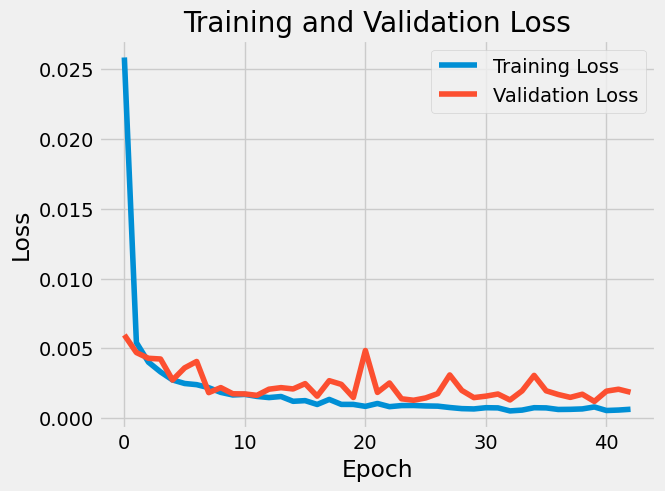

In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

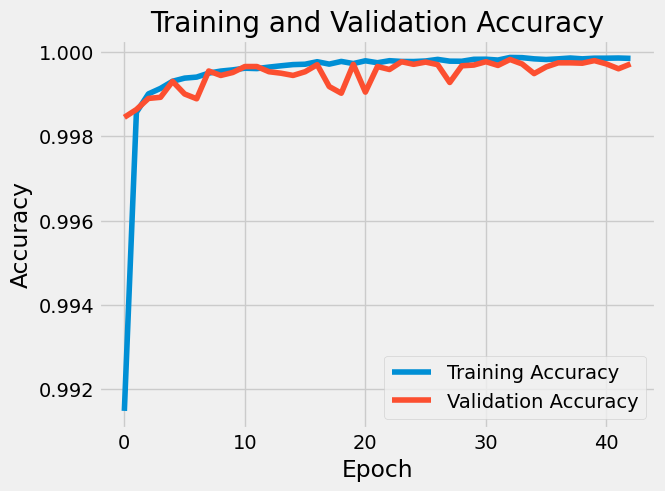

In [17]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

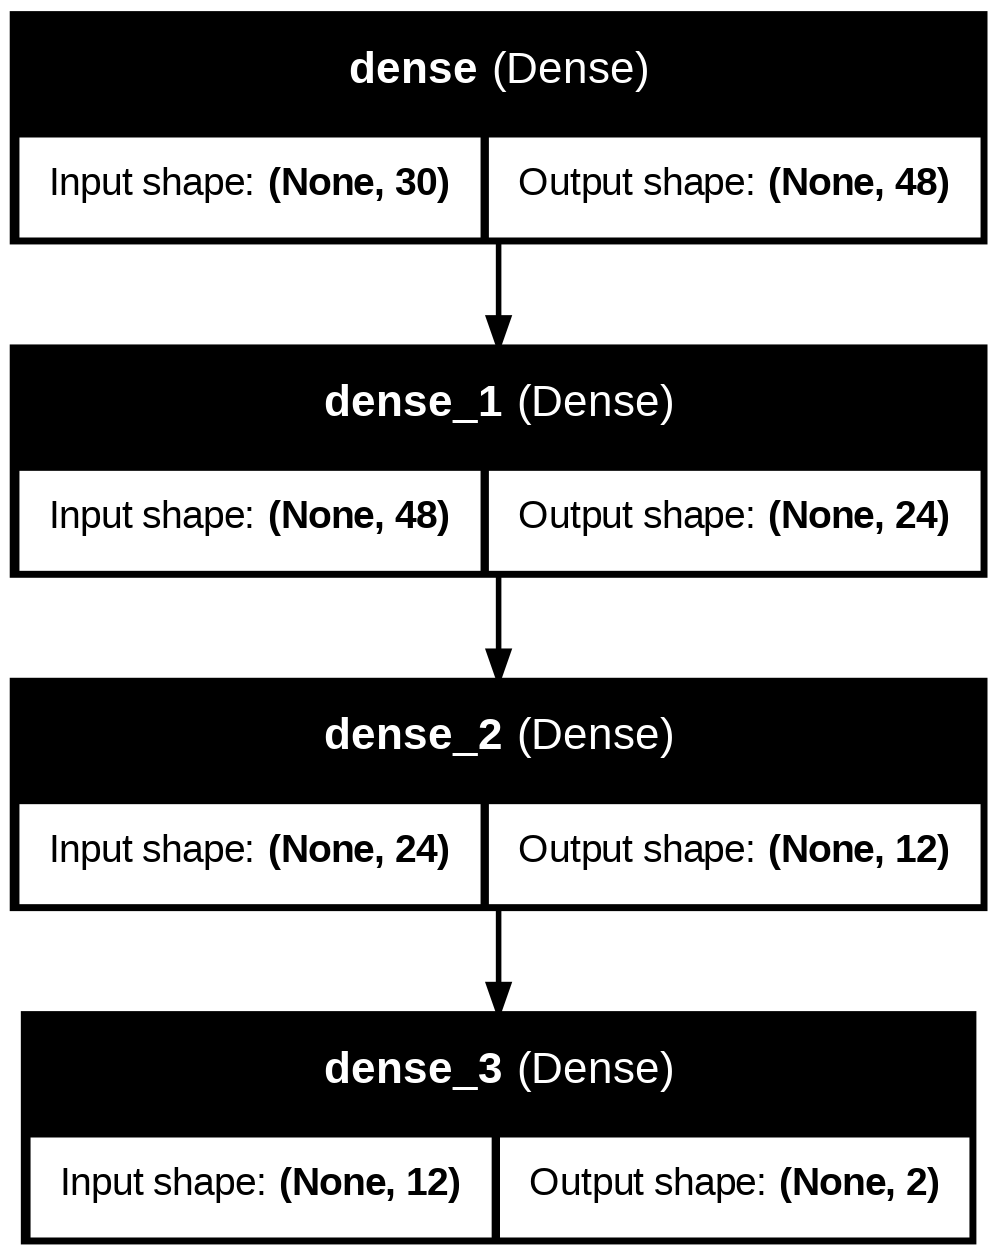

In [18]:
plot_model(modelAdam, to_file='modelAdam.png', show_shapes=True, show_layer_names=True)

In [19]:
y_pred_multiclassAdam = np.argmax(modelAdam.predict(testFile_scaled), axis=1)

dictt = {
    "ID": [i for i in range(len(testFile))],
    "Class": y_pred_multiclassAdam
}
df = pd.DataFrame(dictt)
df.to_csv("Final 3 Layers 22ep ADAM.csv", index=False)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [20]:
modelAdam.save('G1 Task 2.keras')